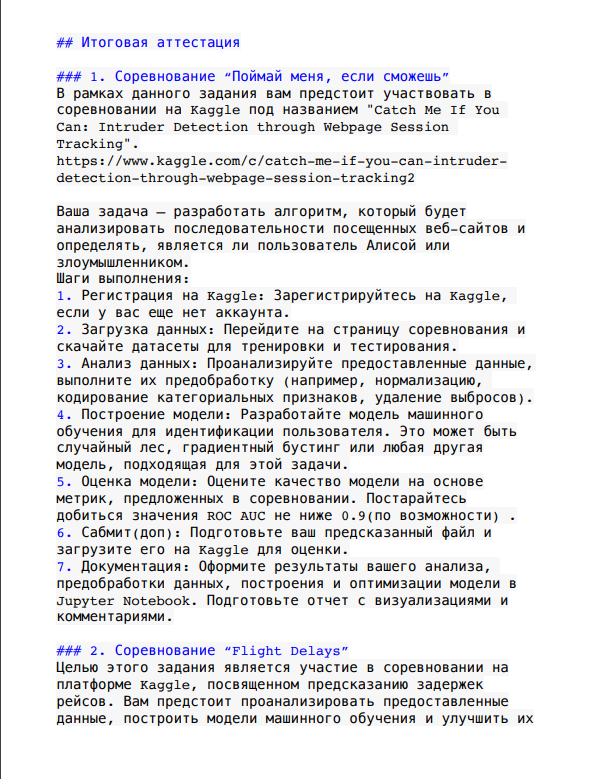


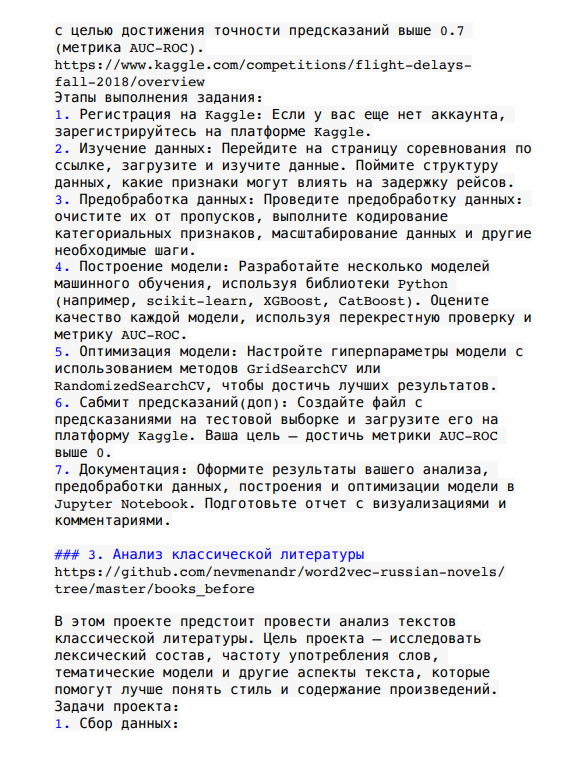


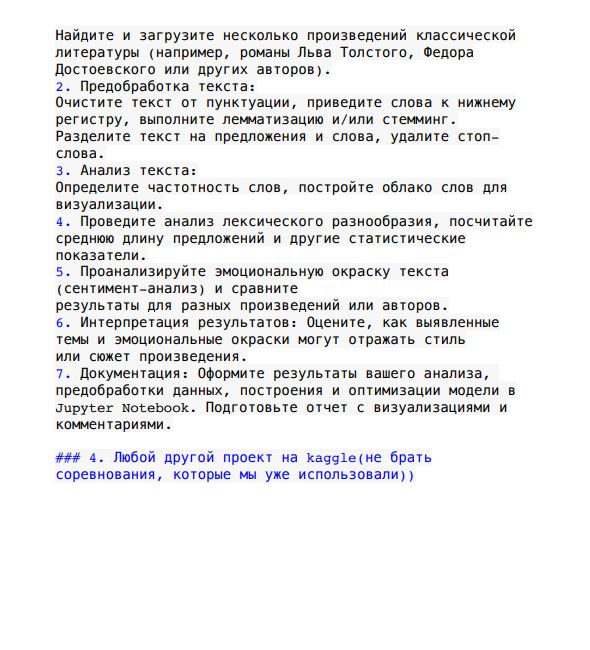

```
Следующие файлы у меня сохранены в папке `51_Attestation_Innopolis` и в Telegram тоже есть. Они относятся к этой аттестации.
```

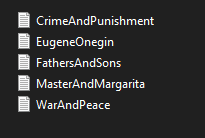

# Шаг 1: Импорт библиотек и загрузка необходимых ресурсов

In [ ]:
import os
import re
import string
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('movie_reviews')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

# Шаг 2: Определение списка текстовых файлов

In [ ]:
files = [
    "FathersAndSons.txt",
    "MasterAndMargarita.txt",
    "WarAndPeace.txt",
    "CrimeAndPunishment.txt",
    "EugeneOnegin.txt"
]

# Шаг 3: Определение вспомогательных функций

In [ ]:
def clean_text(text):
    """Очистка и предобработка текста."""
    text = text.lower()  # Приведение текста к нижнему регистру
    text = re.sub(f"[{string.punctuation}]", "", text)  # Удаление пунктуации
    text = re.sub(r"\d+", "", text)  # Удаление цифр
    return text

In [ ]:
def lemmatize_text(words):
    """Лемматизация токенизированных слов."""
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

# Шаг 4: Инициализация списка стоп-слов

In [ ]:
stop_words = set(stopwords.words("russian"))

# Шаг 5: Загрузка и очистка текстовых данных

In [ ]:
all_texts = ""
text_data = {}

In [ ]:
for file in files:
    with open(f"{file}", "r", encoding="utf-8") as f:
        raw_text = f.read()
        cleaned_text = clean_text(raw_text)
        all_texts += cleaned_text
        text_data[file] = cleaned_text

# Шаг 6: Токенизация и предобработка текста

In [ ]:
word_data = {}

In [ ]:
for file, text in text_data.items():
    tokens = word_tokenize(text, language='russian')
    words = [word for word in tokens if word not in stop_words and len(word) > 1]
    lemmatized_words = lemmatize_text(words)
    word_data[file] = lemmatized_words

# Шаг 7: Анализ частотности слов

In [ ]:
for file, words in word_data.items():
    word_freq = Counter(words)
    print(f"Топ-10 слов в {file}:")
    print(word_freq.most_common(10))

Топ-10 слов в FathersAndSons.txt:
[('это', 392), ('базаров', 386), ('петрович', 298), ('аркадий', 289), ('всё', 199), ('павел', 162), ('николай', 147), ('очень', 103), ('василий', 97), ('тебе', 96)]
Топ-10 слов в MasterAndMargarita.txt:
[('это', 644), ('маргарита', 421), ('сказал', 275), ('иван', 241), ('ответил', 241), ('коровьев', 188), ('очень', 187), ('воланд', 186), ('прокуратор', 179), ('глаза', 169)]
Топ-10 слов в WarAndPeace.txt:
[('это', 2434), ('сказал', 1999), ('пьер', 1383), ('князь', 1329), ('наташа', 824), ('андрей', 793), ('de', 728), ('сказала', 716), ('время', 711), ('которые', 662)]
Топ-10 слов в CrimeAndPunishment.txt:
[('это', 1386), ('всё', 953), ('раскольников', 567), ('очень', 382), ('соня', 267), ('человек', 248), ('разумихин', 244), ('петрович', 208), ('время', 206), ('тебе', 204)]
Топ-10 слов в EugeneOnegin.txt:
[('онегин', 65), ('татьяна', 64), ('иль', 57), ('евгений', 48), ('своей', 38), ('ль', 38), ('сердце', 33), ('пора', 29), ('ленский', 29), ('лет', 28)]

# Шаг 8: Генерация облаков слов

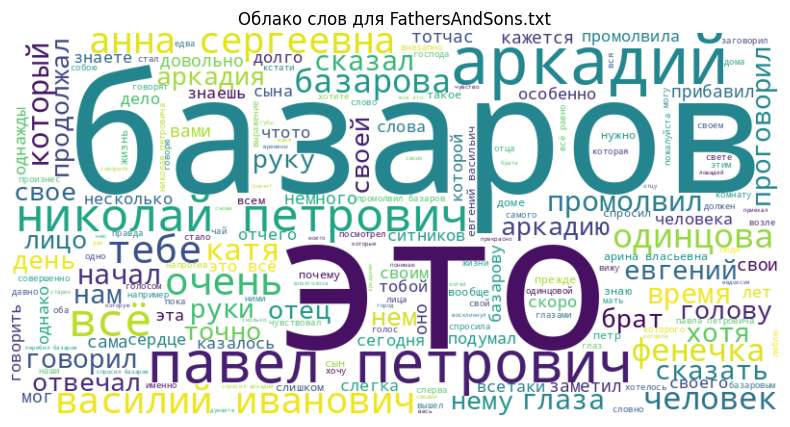

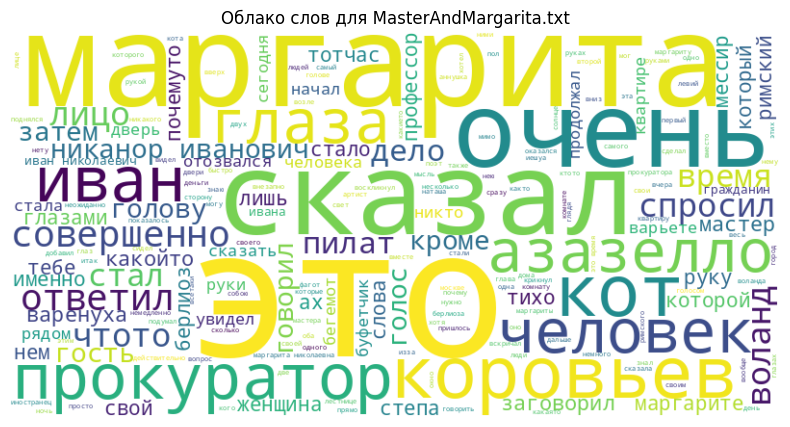

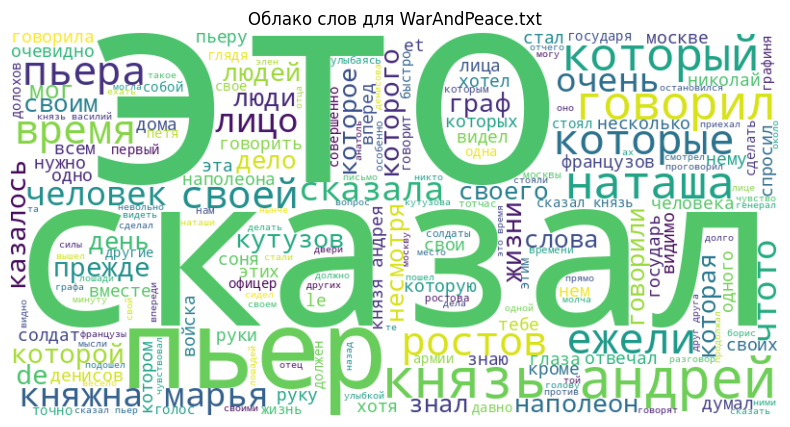

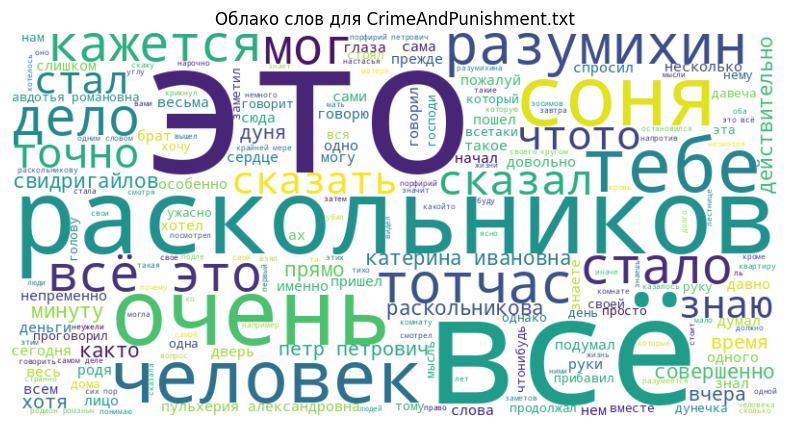

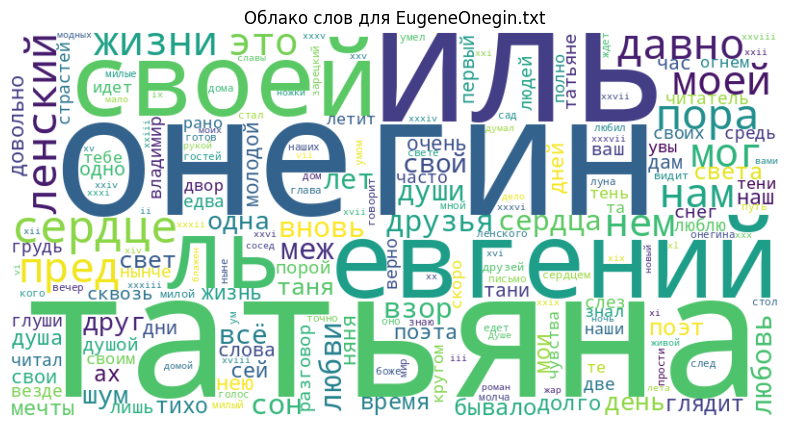

In [ ]:
for file, words in word_data.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Облако слов для {file}")
    plt.show()

# Шаг 9: Расчет лексического разнообразия

In [ ]:
for file, words in word_data.items():
    lexical_diversity = len(set(words)) / len(words)
    print(f"Лексическое разнообразие в {file}: {lexical_diversity:.4f}")

Лексическое разнообразие в FathersAndSons.txt: 0.3982
Лексическое разнообразие в MasterAndMargarita.txt: 0.3332
Лексическое разнообразие в WarAndPeace.txt: 0.1852
Лексическое разнообразие в CrimeAndPunishment.txt: 0.2733
Лексическое разнообразие в EugeneOnegin.txt: 0.5475


# Шаг 10: Расчет статистики по предложениям

In [ ]:
for file, text in text_data.items():
    sentences = sent_tokenize(text, language='russian')
    avg_sentence_length = sum(len(word_tokenize(sent, language='russian')) for sent in sentences) / len(sentences)
    print(f"Средняя длина предложения в {file}: {avg_sentence_length:.2f}")

Средняя длина предложения в FathersAndSons.txt: 54302.00
Средняя длина предложения в MasterAndMargarita.txt: 118726.00
Средняя длина предложения в WarAndPeace.txt: 448110.00
Средняя длина предложения в CrimeAndPunishment.txt: 170137.00
Средняя длина предложения в EugeneOnegin.txt: 23046.00


# Шаг 11: Анализ тональности текста

In [ ]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

In [ ]:
for file, text in text_data.items():
    blob = TextBlob(text, analyzer=NaiveBayesAnalyzer())
    sentiment = blob.sentiment
    print(f"Результат анализа тональности для {file}:")
    print(f"Классификация: {sentiment.classification}, Позитивность: {sentiment.p_pos:.4f}, Негативность: {sentiment.p_neg:.4f}")

Результат анализа тональности для FathersAndSons.txt:
Классификация: pos, Позитивность: 0.9974, Негативность: 0.0026
Результат анализа тональности для MasterAndMargarita.txt:
Классификация: pos, Позитивность: 0.5000, Негативность: 0.5000
Результат анализа тональности для WarAndPeace.txt:
Классификация: pos, Позитивность: 1.0000, Негативность: 0.0000
Результат анализа тональности для CrimeAndPunishment.txt:
Классификация: neg, Позитивность: 0.0476, Негативность: 0.9524
Результат анализа тональности для EugeneOnegin.txt:
Классификация: neg, Позитивность: 0.0837, Негативность: 0.9163
